# Histograms

In [6]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

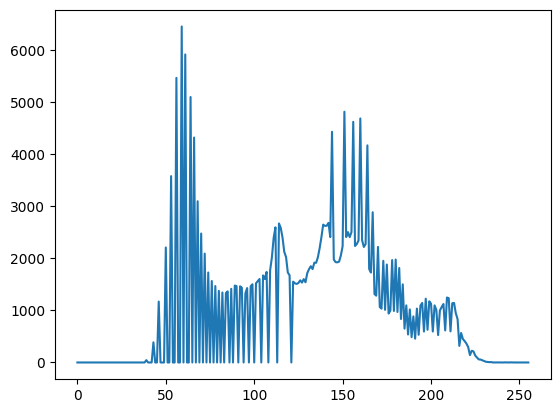

In [34]:
img = cv2.imread('C:/Users/USER/Desktop/AI Lab/Data/01-Data/lena.png', 0) 

hist = cv2.calcHist([img],[0],None,[256],[0,256]) #(list of images, list of channels we want to plot for each image, mask, no. of bins, color range)

#plot the histogram
plt.plot(hist)

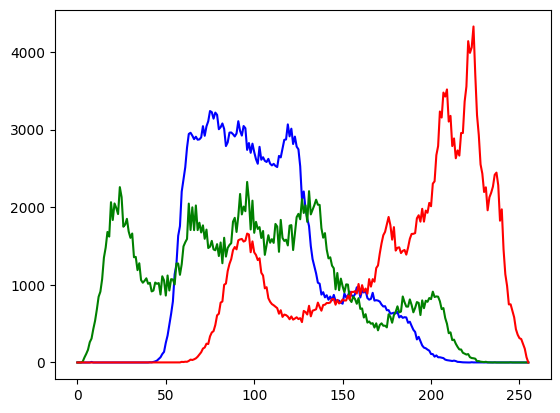

In [22]:
img = cv2.imread('C:/Users/USER/Desktop/AI Lab/Data/01-Data/lena.png')  #do not read in grayscale

color = ('b','g','r')
for i, col in enumerate(color):
    hist = cv2.calcHist([img],[i],None,[256],[0,255])
    #plot the histogram
    plt.plot(hist, color=col)
    

In [37]:
img = cv2.imread('C:/Users/USER/Desktop/AI Lab/Data/01-Data/lena.png',0)  

img_eq = cv2.equalizeHist(img)  #takes a single channel image as input

# equalize istogram, spreading evenly values of pizel

show_img = np.hstack([img, img_eq])
cv2.imshow('Equalization', show_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

### Equalize each channel of our image

In [27]:
img = cv2.imread('C:/Users/USER/Desktop/AI Lab/Data/01-Data/lena.png')  

eq_channels = []
channels = cv2.split(img)

for ch in channels:
    eq_channels.append(cv2.equalizeHist(ch))
    
# merge channels back together
img_eq = cv2.merge(eq_channels)

    
show_img = np.hstack([img,img_eq])
cv2.imshow('Equalization', show_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

#the pixels have been redistributed more or less evenly
# this is a good fix for an image that is "too reddish"

### Changing color space

In [8]:
img = cv2.imread('C:/Users/USER/Desktop/AI Lab/Data/01-Data/lena.png')  

#change the color space
# hue: the color itself
# saturation: color intensity
# value: color brightness
hsv_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

#split channels of image
h,s,v = cv2.split(hsv_img)

eq_v = cv2.equalizeHist(v) #equalize v channel

img_eq = cv2.merge([h,s,eq_v]) #CAREFUL HERE! with the order 

img_eq = cv2.cvtColor(img_eq, cv2.COLOR_HSV2BGR) #turn back into BGR, otherwise plotting fails

show_img = np.hstack([img,img_eq])
cv2.imshow('Equalization', show_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

# color remains the same, we did not change the color channel. we worked and fixed brightness. ! so cool

# EXERCISE: play with equalizing other channels. be careful when inserting order at merge function